In [216]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import numpy as np
import matplotlib.pyplot as plt

### Reading data into dataframes

In [217]:
confirmCasesDF1 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [218]:
demiseCasesDF2 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

### Explore the Data

In [4]:
confirmCasesDF1.shape

(289, 1147)

In [5]:
demiseCasesDF2.shape

(289, 1147)

In [6]:
pd.set_option('display.max_rows', 289)
pd.set_option('display.max_columns', 1147)

In [7]:
confirmCasesDF1.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        5        5   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        5        5        5        5       5       5       5       5       5   
1        0        0        0        0       0       0       0       0       0   
2        1        1        1        1       1       3       5      12      12   
3        0        0        0        0       0       1       1       1       1   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       5       8       8       8        8       11       11       11   
1       0       0       0       2       10       12       23       33   
2      17      17      19      20       20       20       24       26   
3       1       1       1       1        1        1        1        1   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0       14       20       25       26       26       26       24       24   
1       38       42       51       55       59       64       70       76   
2       37       48       54       60       74       87       90      139   
3        1        1        2       39       39       53       75       88   
4        0        0        0        0        0        0        1        2   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0       34       40       42       74       80       91      106      114   
1       89      104      123      146      174      186      197      212   
2      201      230      264      302      367      409      454      511   
3      1

In [8]:
demiseCasesDF2.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        0        0        0        0       0       0       0       0       0   
1        0        0        0        0       0       0       0       0       0   
2        0        0        0        0       0       0       0       0       0   
3        0        0        0        0       0       0       0       0       0   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        1        1        1   
2       0       0       0       0        0        0        1        2   
3       0       0       0       0        0        0        0        0   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        1        2        2        2        2   
2        3        4        4        4        7        9       11       15   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0        0        1        1        1        2        2        2        4   
1        2        4        5        5        6        8       10       10   
2       17       17       19       21       25       26       29       31   
3       

In [9]:
confirmCasesDF1.tail()

Province/State        Country/Region        Lat        Long  1/22/20  \
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
284        0        0        0        0        0        0        0        0   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        0        0   
288        0        0        0        0        0        0        0        0   

     1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
284        0       0       0       0       0       0       0       0       0   
285        0       0       0       0       0       0       0       0       0   
286        0       0       0       0       0       0       0       0       0   
287        0       0       0       0       0       0       0       0       0   
288        0       0       0       0       0       0       0       0       0   

     2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
284       0        0        0        0        0        0        0        0   
285       0        0        0        0        0        0        0        0   
286       0        0        0        0        0        0        0        0   
287       0        0        0        0        0        0        0        0   
288       0        0        0        0        0        0        0        0   

     2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
284        0        0        0        0        0        0        0        0   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        0        0   
288        0        0        0        0        0        0        0        0   

     2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
284        0        0        0        0        0       0       0       0   
285        0        0        0        0        0       0       0       0   
286        0        0        0        0        0       0       0       0   
287        0        0        0        0        0       0       0       0   
288        0        0        0        0        0       0       0       0   

     3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
284       0       4       7      16      16      19       26       30   
285       0       0       0       0       0       0        0        0   
286       0       0       0       0       0       0        0        0   
287       0       0       0       0       0       0        0        0   
288       0       0       0       0       0       0        0        0   

     3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
284       30       31       35       38       38       39       41       44   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        2        2   
288        0        0        0        0        0        0        0        0   

     3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
284       47       48       52       59       59       59       84       91   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0

In [10]:
demiseCasesDF2.tail()

Province/State        Country/Region        Lat        Long  1/22/20  \
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
284        0        0        0        0        0        0        0        0   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        0        0   
288        0        0        0        0        0        0        0        0   

     1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
284        0       0       0       0       0       0       0       0       0   
285        0       0       0       0       0       0       0       0       0   
286        0       0       0       0       0       0       0       0       0   
287        0       0       0       0       0       0       0       0       0   
288        0       0       0       0       0       0       0       0       0   

     2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
284       0        0        0        0        0        0        0        0   
285       0        0        0        0        0        0        0        0   
286       0        0        0        0        0        0        0        0   
287       0        0        0        0        0        0        0        0   
288       0        0        0        0        0        0        0        0   

     2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
284        0        0        0        0        0        0        0        0   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        0        0   
288        0        0        0        0        0        0        0        0   

     2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
284        0        0        0        0        0       0       0       0   
285        0        0        0        0        0       0       0       0   
286        0        0        0        0        0       0       0       0   
287        0        0        0        0        0       0       0       0   
288        0        0        0        0        0       0       0       0   

     3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
284       0       0       0       0       0       0        0        0   
285       0       0       0       0       0       0        0        0   
286       0       0       0       0       0       0        0        0   
287       0       0       0       0       0       0        0        0   
288       0       0       0       0       0       0        0        0   

     3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
284        0        0        0        0        0        0        0        0   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0        0        0        0        0   
287        0        0        0        0        0        0        0        0   
288        0        0        0        0        0        0        0        0   

     3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
284        0        0        0        0        0        0        1        1   
285        0        0        0        0        0        0        0        0   
286        0        0        0        0

In [11]:
# basic information about the DataFrame
confirmCasesDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [12]:
demiseCasesDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [13]:
# summary statistics of the numerical columns
confirmCasesDF1.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  287.000000  287.000000  289.000000  289.000000  289.000000  289.000000   
mean    19.718719   22.182084    1.927336    2.273356    3.266436    4.972318   
std     25.956609   77.870931   26.173664   26.270191   32.707271   45.523871   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.072192  -32.823050    0.000000    0.000000    0.000000    0.000000   
50%     21.512583   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     40.401784   89.224350    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20      1/30/20  \
count   289.000000   289.000000   289.000000   289.000000   289.000000   
mean      7.335640    10.134948    19.307958    21.346021    28.501730   
std      63.623197    85.724481   210.329649   211.628535   291.630499   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max    1058.000000  1423.000000  3554.000000  3554.000000  4903.000000   

           1/31/20       2/1/20        2/2/20        2/3/20        2/4/20  \
count   289.000000   289.000000    289.000000    289.000000    289.000000   
mean     34.349481    41.653979     58.086505     68.813149     82.695502   
std     345.759248   425.471558    661.171033    799.258224    985.038344   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.000000      0.000000      0.000000      0.000000   
50%       0.000000     0.000000      0.000000      0.000000      0.000000   
75%       0.000000     0.000000      0.000000      0.000000      0.000000   
max    5806.000000  7153.000000  11177.000000  13522.000000  16678.000000   

             2/5/20        2/6/20        2/7/20        2/8/20        2/9/20  \
count    289.000000    289.000000    289.000000    289.000000    289.000000   
mean      95.653979    106.595156    119.031142    128.480969    138.968858   
std     1160.785189   1304.872173   1472.006165   1598.378021   1747.162098   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    19665.000000  22112.000000  24953.000000  27100.000000  29631.000000   

            2/10/20       2/11/20       2/12/20       2/13/20       2/14/20  \
count    289.000000    289.000000    289.000000    289.000000    289.000000   
mean     147.996540    155.065744    156.512111    208.941176    231.529412   
std     1870.449899   1966.785835   1967.121793   2838.127785   3202.384554   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    31728.000000  33366.000000  33366.000000  48206.000000  54406.000000   

            2/15/20       2/16/20       2/17/20       2/18/20       2/19/20  \
count    289.000000    289.000000    289.000000    289.000000    289.000000   
mean     238.944637    246.498270    253.539792    260.051903    261.782007   
std     3310.754868   3424.390905   3530.604364   3630.117030   3650.660287   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      

In [14]:
demiseCasesDF2.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  287.000000  287.000000  289.000000  289.000000  289.000000  289.000000   
mean    19.718719   22.182084    0.058824    0.062284    0.089965    0.145329   
std     25.956609   77.870931    1.000000    1.001525    1.413797    2.353998   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.072192  -32.823050    0.000000    0.000000    0.000000    0.000000   
50%     21.512583   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     40.401784   89.224350    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20     1/30/20     1/31/20  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean     0.193772    0.283737    0.453287    0.460208    0.595156    0.740484   
std      3.060245    4.471644    7.353103    7.353616    9.529857   11.999933   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     52.000000   76.000000  125.000000  125.000000  162.000000  204.000000   

           2/1/20      2/2/20      2/3/20      2/4/20      2/5/20      2/6/20  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean     0.899654    1.259516    1.480969    1.709343    1.958478    2.200692   
std     14.646540   20.587174   24.351602   28.174776   32.291936   36.350644   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max    249.000000  350.000000  414.000000  479.000000  549.000000  618.000000   

           2/7/20      2/8/20      2/9/20     2/10/20      2/11/20  \
count  289.000000  289.000000  289.000000  289.000000   289.000000   
mean     2.494810    2.795848    3.141869    3.512111     3.858131   
std     41.114772   45.879104   51.231405   57.289658    62.818775   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max    699.000000  780.000000  871.000000  974.000000  1068.000000   

           2/12/20      2/13/20      2/14/20      2/15/20      2/16/20  \
count   289.000000   289.000000   289.000000   289.000000   289.000000   
mean      3.875433     4.750865     5.276817     5.771626     6.131488   
std      62.818508    77.052383    85.699367    93.875378    99.756666   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max    1068.000000  1310.000000  1457.000000  1596.000000  1696.000000   

           2/17/20      2/18/20      2/19/20      2/20/20      2/21/20  \
count   289.000000   289.000000   289.000000   289.000000   289.000000   
mean      6.470588     6.955017     7.352941     7.785467     7.799308   
std     105.227432   112.991833   119.343371   126.105923   126.105285   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     

In [15]:
# Exploring unique values in categorical columns
print("No of rows in table : ",confirmCasesDF1['Country/Region'].count())
print("No of unique country names : ", confirmCasesDF1['Country/Region'].nunique())
print("\n",pd.DataFrame(confirmCasesDF1['Country/Region'].unique(), columns=['Unique Country Names']))


No of rows in table :  289
No of unique country names :  201

                  Unique Country Names
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                          Antarctica
6                 Antigua and Barbuda
7                           Argentina
8                             Armenia
9                           Australia
10                            Austria
11                         Azerbaijan
12                            Bahamas
13                            Bahrain
14                         Bangladesh
15                           Barbados
16                            Belarus
17                            Belgium
18                             Belize
19                              Benin
20                             Bhutan
21                            Bolivia
22             Bosnia and Herzegovina
23                       

In [16]:
# Exploring unique values in categorical columns
print("No of unique Province names : ", confirmCasesDF1['Province/State'].nunique())
print("\n",pd.DataFrame(confirmCasesDF1['Province/State'].unique(), columns=['Unique Province Names']))

No of unique Province names :  91

                            Unique Province Names
0                                            NaN
1                   Australian Capital Territory
2                                New South Wales
3                             Northern Territory
4                                     Queensland
5                                South Australia
6                                       Tasmania
7                                       Victoria
8                              Western Australia
9                                        Alberta
10                              British Columbia
11                              Diamond Princess
12                                Grand Princess
13                                      Manitoba
14                                 New Brunswick
15                     Newfoundland and Labrador
16                         Northwest Territories
17                                   Nova Scotia
18                               

In [17]:
# Exploring unique values in categorical columns
print("No of rows in table : ",demiseCasesDF2['Country/Region'].count())
print("No of unique country names : ", demiseCasesDF2['Country/Region'].nunique())
print("\n",pd.DataFrame(demiseCasesDF2['Country/Region'].unique(), columns=['Unique Country Names']))

No of rows in table :  289
No of unique country names :  201

                  Unique Country Names
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                          Antarctica
6                 Antigua and Barbuda
7                           Argentina
8                             Armenia
9                           Australia
10                            Austria
11                         Azerbaijan
12                            Bahamas
13                            Bahrain
14                         Bangladesh
15                           Barbados
16                            Belarus
17                            Belgium
18                             Belize
19                              Benin
20                             Bhutan
21                            Bolivia
22             Bosnia and Herzegovina
23                       

In [18]:
#print(confirmCasesDF1.columns[confirmCasesDF1.isnull().sum()>0])
# checking missing data
# missing values are in 3 columns only out of 289 that is 'Province/State', 'Lat', 'Long' . we are good with these columns, no need to remove these for now.
print(confirmCasesDF1.columns[confirmCasesDF1.isna().sum()>0])

Index(['Province/State', 'Lat', 'Long'], dtype='object')


In [19]:
#print(demiseCasesDF2.columns[demiseCasesDF2.isnull().sum()>0])
# checking missing data
# missing values are in 3 columns only out of 289 that is 'Province/State', 'Lat', 'Long' . we are good with these columns, no need to remove these for now.
print(demiseCasesDF2.columns[demiseCasesDF2.isna().sum()>0])

Index(['Province/State', 'Lat', 'Long'], dtype='object')


In [20]:
confirmCasesDF1.loc[confirmCasesDF1['Country/Region']=='Antarctica']
confirmCasesDF1.loc[confirmCasesDF1['Country/Region']=='Diamond Princess']
confirmCasesDF1.loc[confirmCasesDF1['Country/Region']=='MS Zaandam']
confirmCasesDF1.loc[confirmCasesDF1['Country/Region']=='Diamond Princess']

Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
106            NaN  Diamond Princess  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
106        0        0        0        0        0        0        0       0   

     2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
106       0       0       0       0       0      61      61      64      135   

     2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
106      135      175      175      218      285      355      454      542   

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
106      621      634      634      634      691      691      691      705   

     2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
106      705      705      705     705     705     706     706     706   

     3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
106     706     706     706     706      706      706      706      706   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
106      706      706      706      706      712      712      712      712   

     3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
106      712      712      712      712      712      712      712      712   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
106      712      712     712     712     712     712     712     712     712   

     4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
106     712     712      712      712      712      712      712      712   

     4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  \
106      712      712      712      712      712      712      712      712   

     4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  \
106      712      712      712      712      712      712      712     712   

     5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  \
106     712     712     712     712     712     712     712     712      712   

     5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  \
106      712      712      712      712      712      712      712      712   

     5/19/20  5/20/20  5/21/20  5/22/20  5/23/20  5/24/20  5/25/20  5/26/20  \
106      712      712      712      712      712      712      712      712   

     5/27/20  5/28/20  5/29/20  5/30/20  5/31/20  6/1/20  6/2/20  6/3/20  \
106      712      712      712      712      712     712     712     712   

     6/4/20  6/5/20  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  6/11/20  \
106     712     712     712     712     712     712      712      712   

     6/12/20  6/13/20  6/14/20  6/15/20  6/16/20  6/17/20  6/18/20  6/19/20  \
106      712      712      712      712      712      712      712      712   

     6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  6/27/20  \
106      712      712      712      712      712      712      712      712   

     6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  7/3/20  7/4/20  7/5/20  \
106      712      712      712     712     712     712     712     712   

     7/6/20  7/7/20  7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  \
106     712     712     712     712      712      712      712      712   

     7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  7/20/20  7/21/20  \
106      712      712      712      712      712      712      712      712   

     7/22/20  7/23/20  7/24/20  7/25/20  7/26/20  7/27/20  7/28/20  7/29/20  \
106      712      712      712      712      712      712      712      712   

     7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  \
106      712      712     712     712     712     712     712     712     712   

     8/8/20  8/9/20  8/10/20  8/11/20  8/12/20  8/13/20  8/14/20  8/15/20  \
106 

In [21]:
confirmCasesDF1.loc[confirmCasesDF1['Long']==0.0]

Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
42   Diamond Princess            Canada  0.0   0.0        0        0        0   
43     Grand Princess            Canada  0.0   0.0        0        0        0   
106               NaN  Diamond Princess  0.0   0.0        0        0        0   
175               NaN        MS Zaandam  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
42         0        0        0        0        0        0        0       0   
43         0        0        0        0        0        0        0       0   
106        0        0        0        0        0        0        0       0   
175        0        0        0        0        0        0        0       0   

     2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
42        0       0       0       0       0       0       0       0        0   
43        0       0       0       0       0       0       0       0        0   
106       0       0       0       0       0      61      61      64      135   
175       0       0       0       0       0       0       0       0        0   

     2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
42         0        0        0        0        0        0        0        0   
43         0        0        0        0        0        0        0        0   
106      135      175      175      218      285      355      454      542   
175        0        0        0        0        0        0        0        0   

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
42         0        0        0        0        0        0        0        0   
43         0        0        0        0        0        0        0        0   
106      621      634      634      634      691      691      691      705   
175        0        0        0        0        0        0        0        0   

     2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
42         0        0        0       0       0       0       0       0   
43         0        0        0       0       0       0       0       0   
106      705      705      705     705     705     706     706     706   
175        0        0        0       0       0       0       0       0   

     3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
42        0       0       0       0        0        0        0        0   
43        0       0       0       0        0        0        0        2   
106     706     706     706     706      706      706      706      706   
175       0       0       0       0        0        0        0        0   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
42         0        0        0        0        0        0        0        0   
43         2        2        2        8        9        9       10       10   
106      706      706      706      706      712      712      712      712   
175        0        0        0        0        0        0        0        0   

     3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
42         0        0        0        0        0        0        0        0   
43        13       13       13       13       13       13       13       13   
106      712      712      712      712      712      712      712      712   
175        0        0        0        0        0        0        2        2   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
42         0        0       0       0       0       0       0       0       0   
43        13       13      13      13      13      13      13      13      13   
106      712      712     712     712     712     712     712     712     712   
175        2        2       9       9       9       9       9       9       9   

     4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/2

In [22]:
demiseCasesDF2.loc[demiseCasesDF2['Country/Region']=='Antarctica']
demiseCasesDF2.loc[demiseCasesDF2['Country/Region']=='Diamond Princess']
demiseCasesDF2.loc[demiseCasesDF2['Country/Region']=='MS Zaandam']
demiseCasesDF2.loc[demiseCasesDF2['Country/Region']=='Diamond Princess']

Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
106            NaN  Diamond Princess  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
106        0        0        0        0        0        0        0       0   

     2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
106       0       0       0       0       0       0       0       0        0   

     2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
106        0        0        0        0        0        0        0        0   

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
106        0        2        2        2        3        3        3        4   

     2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
106        4        6        6       6       6       6       6       6   

     3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
106       6       6       6       6        6        7        7        7   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
106        7        7        7        7        7        7        7        8   

     3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
106        8        8       10       10       10       10       10       10   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
106       10       10      11      11      11      11      11      11      11   

     4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
106      11      11       11       11       11       11       12       12   

     4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  \
106       12       13       13       13       13       13       13       13   

     4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  \
106       13       13       13       13       13       13       13      13   

     5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  \
106      13      13      13      13      13      13      13      13       13   

     5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  \
106       13       13       13       13       13       13       13       13   

     5/19/20  5/20/20  5/21/20  5/22/20  5/23/20  5/24/20  5/25/20  5/26/20  \
106       13       13       13       13       13       13       13       13   

     5/27/20  5/28/20  5/29/20  5/30/20  5/31/20  6/1/20  6/2/20  6/3/20  \
106       13       13       13       13       13      13      13      13   

     6/4/20  6/5/20  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  6/11/20  \
106      13      13      13      13      13      13       13       13   

     6/12/20  6/13/20  6/14/20  6/15/20  6/16/20  6/17/20  6/18/20  6/19/20  \
106       13       13       13       13       13       13       13       13   

     6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  6/27/20  \
106       13       13       13       13       13       13       13       13   

     6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  7/3/20  7/4/20  7/5/20  \
106       13       13       13      13      13      13      13      13   

     7/6/20  7/7/20  7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  \
106      13      13      13      13       13       13       13       13   

     7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  7/20/20  7/21/20  \
106       13       13       13       13       13       13       13       13   

     7/22/20  7/23/20  7/24/20  7/25/20  7/26/20  7/27/20  7/28/20  7/29/20  \
106       13       13       13       13       13       13       13       13   

     7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  \
106       13       13      13      13      13      13      13      13      13   

     8/8/20  8/9/20  8/10/20  8/11/20  8/12/20  8/13/20  8/14/20  8/15/20  \
106 

In [23]:
demiseCasesDF2.loc[demiseCasesDF2['Long']==0.0]

Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
42   Diamond Princess            Canada  0.0   0.0        0        0        0   
43     Grand Princess            Canada  0.0   0.0        0        0        0   
106               NaN  Diamond Princess  0.0   0.0        0        0        0   
175               NaN        MS Zaandam  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
42         0        0        0        0        0        0        0       0   
43         0        0        0        0        0        0        0       0   
106        0        0        0        0        0        0        0       0   
175        0        0        0        0        0        0        0       0   

     2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
42        0       0       0       0       0       0       0       0        0   
43        0       0       0       0       0       0       0       0        0   
106       0       0       0       0       0       0       0       0        0   
175       0       0       0       0       0       0       0       0        0   

     2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
42         0        0        0        0        0        0        0        0   
43         0        0        0        0        0        0        0        0   
106        0        0        0        0        0        0        0        0   
175        0        0        0        0        0        0        0        0   

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
42         0        0        0        0        0        0        0        0   
43         0        0        0        0        0        0        0        0   
106        0        2        2        2        3        3        3        4   
175        0        0        0        0        0        0        0        0   

     2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
42         0        0        0       0       0       0       0       0   
43         0        0        0       0       0       0       0       0   
106        4        6        6       6       6       6       6       6   
175        0        0        0       0       0       0       0       0   

     3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
42        0       0       0       0        0        0        0        0   
43        0       0       0       0        0        0        0        0   
106       6       6       6       6        6        7        7        7   
175       0       0       0       0        0        0        0        0   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
42         0        0        0        0        0        0        0        0   
43         0        0        0        0        0        0        0        0   
106        7        7        7        7        7        7        7        8   
175        0        0        0        0        0        0        0        0   

     3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
42         1        1        1        1        1        1        1        1   
43         0        0        0        0        0        0        0        0   
106        8        8       10       10       10       10       10       10   
175        0        0        0        0        0        0        0        0   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
42         1        1       1       1       1       1       1       1       1   
43         0        0       0       0       0       0       0       0       0   
106       10       10      11      11      11      11      11      11      11   
175        0        0       2       2       2       2       2       2       2   

     4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/2

### Renaming column

In [219]:
confirmCasesDF1.rename(columns={'Province/State':'Province', 'Country/Region':'Country'}, inplace=True)
confirmCasesDF1.head()

Province      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0      NaN  Afghanistan  33.93911  67.709953        0        0        0   
1      NaN      Albania  41.15330  20.168300        0        0        0   
2      NaN      Algeria  28.03390   1.659600        0        0        0   
3      NaN      Andorra  42.50630   1.521800        0        0        0   
4      NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        5        5        5   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        1        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        5        5        5       5       5       5       5       5       5   
1        0        0        0       0       0       0       0       0       0   
2        1        1        1       1       3       5      12      12      17   
3        0        0        0       0       1       1       1       1       1   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       8       8       8        8       11       11       11       14   
1       0       0       2       10       12       23       33       38   
2      17      19      20       20       20       24       26       37   
3       1       1       1        1        1        1        1        1   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0       20       25       26       26       26       24       24       34   
1       42       51       55       59       64       70       76       89   
2       48       54       60       74       87       90      139      201   
3        1        2       39       39       53       75       88      113   
4        0        0        0        0        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0       40       42       74       80       91      106      114      114   
1      104      123      146      174      186      197      212      223   
2      230      264      302      367      409      454      511      584   
3 

In [220]:
demiseCasesDF2.rename(columns={'Province/State':'Province', 'Country/Region':'Country'}, inplace=True)
demiseCasesDF2.head()

Province      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0      NaN  Afghanistan  33.93911  67.709953        0        0        0   
1      NaN      Albania  41.15330  20.168300        0        0        0   
2      NaN      Algeria  28.03390   1.659600        0        0        0   
3      NaN      Andorra  42.50630   1.521800        0        0        0   
4      NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        0        0        0       0       0       0       0       0       0   
1        0        0        0       0       0       0       0       0       0   
2        0        0        0       0       0       0       0       0       0   
3        0        0        0       0       0       0       0       0       0   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        1        1        1        1   
2       0       0       0        0        0        1        2        3   
3       0       0       0        0        0        0        0        0   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        2        2        2        2        2   
2        4        4        4        7        9       11       15       17   
3        0        0        0        0        0        0        0        1   
4        0        0        0        0        0        0        0        0   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0        1        1        1        2        2        2        4        4   
1        4        5        5        6        8       10       10       11   
2       17       19       21       25       26       29       31       35   
3 

### Data Cleaning

In [221]:
# import numpy as np
# Some country names are invalid or having some special characters, Need to clean those country names
confirmCasesDF1["Country"].replace("Winter Olympics 2022", "Invalid", inplace=True)
confirmCasesDF1["Country"].replace("Summer Olympics 2020", "Invalid", inplace=True)
confirmCasesDF1["Country"].replace("Diamond Princess", "Invalid", inplace=True)
confirmCasesDF1["Country"].replace("MS Zaandam", "Invalid", inplace=True)
confirmCasesDF1["Country"].replace("Korea, North", "North Korea", inplace=True)
confirmCasesDF1["Country"].replace("Korea, South", "South Korea", inplace=True)
confirmCasesDF1["Country"].replace("Taiwan*", "Taiwan", inplace=True)
confirmCasesDF1["Country"].replace("Invalid", np.nan, inplace=True)
confirmCasesDF1.dropna(subset=['Country'], inplace=True)
print("No of rows in table : ",confirmCasesDF1['Country'].count())
print("No of unique country names : ", confirmCasesDF1['Country'].nunique())
print("New shape : ", confirmCasesDF1.shape)
print("\n",pd.DataFrame(confirmCasesDF1['Country'].unique(), columns=['Unique Country Names']))

No of rows in table :  285
No of unique country names :  197
New shape :  (285, 1147)

                  Unique Country Names
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                          Antarctica
6                 Antigua and Barbuda
7                           Argentina
8                             Armenia
9                           Australia
10                            Austria
11                         Azerbaijan
12                            Bahamas
13                            Bahrain
14                         Bangladesh
15                           Barbados
16                            Belarus
17                            Belgium
18                             Belize
19                              Benin
20                             Bhutan
21                            Bolivia
22             Bosnia and Herzegovina


In [222]:
confirmCasesDF1["Province"].replace("Diamond Princess", "Invalid1", inplace=True)
confirmCasesDF1["Province"].replace("Grand Princess", "Invalid1", inplace=True)
confirmCasesDF1["Province"].replace("Repatriated Travellers", "Invalid1", inplace=True)
confirmCasesDF1.drop(confirmCasesDF1.loc[(confirmCasesDF1['Country']=="Canada") & (confirmCasesDF1['Province']=='Invalid1')].index, inplace=True)
confirmCasesDF1.loc[(confirmCasesDF1['Country']=="Canada") & (confirmCasesDF1['Province']=='Invalid1')]

Empty DataFrame
Columns: [Province, Country, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

In [223]:
# Some country names are invalid or having some special characters, Need to clean those country names
# import numpy as np
demiseCasesDF2["Country"].replace("Winter Olympics 2022", "Invalid", inplace=True)
demiseCasesDF2["Country"].replace("Summer Olympics 2020", "Invalid", inplace=True)
demiseCasesDF2["Country"].replace("Diamond Princess", "Invalid", inplace=True)
demiseCasesDF2["Country"].replace("MS Zaandam", "Invalid", inplace=True)
demiseCasesDF2["Country"].replace("Korea, North", "North Korea", inplace=True)
demiseCasesDF2["Country"].replace("Korea, South", "South Korea", inplace=True)
demiseCasesDF2["Country"].replace("Taiwan*", "Taiwan", inplace=True)
demiseCasesDF2["Country"].replace("Invalid", np.nan, inplace=True)
demiseCasesDF2.dropna(subset=['Country'], inplace=True)
print("No of rows in table : ",demiseCasesDF2['Country'].count())
print("No of unique country names : ", demiseCasesDF2['Country'].nunique())
print("New shape : ", demiseCasesDF2.shape)
print("\n",pd.DataFrame(demiseCasesDF2['Country'].unique(), columns=['Unique Country Names']))

No of rows in table :  285
No of unique country names :  197
New shape :  (285, 1147)

                  Unique Country Names
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                          Antarctica
6                 Antigua and Barbuda
7                           Argentina
8                             Armenia
9                           Australia
10                            Austria
11                         Azerbaijan
12                            Bahamas
13                            Bahrain
14                         Bangladesh
15                           Barbados
16                            Belarus
17                            Belgium
18                             Belize
19                              Benin
20                             Bhutan
21                            Bolivia
22             Bosnia and Herzegovina


In [224]:
demiseCasesDF2["Province"].replace("Diamond Princess", "Invalid1", inplace=True)
demiseCasesDF2["Province"].replace("Grand Princess", "Invalid1", inplace=True)
demiseCasesDF2["Province"].replace("Repatriated Travellers", "Invalid1", inplace=True)
demiseCasesDF2.drop(demiseCasesDF2.loc[(demiseCasesDF2['Country']=="Canada") & (demiseCasesDF2['Province']=='Invalid1')].index, inplace=True)
demiseCasesDF2.loc[(demiseCasesDF2['Country']=="Canada") & (demiseCasesDF2['Province']=='Invalid1')]

Empty DataFrame
Columns: [Province, Country, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

In [212]:
confirmCasesDF1.head()

Province      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0      NaN  Afghanistan  33.93911  67.709953        0        0        0   
1      NaN      Albania  41.15330  20.168300        0        0        0   
2      NaN      Algeria  28.03390   1.659600        0        0        0   
3      NaN      Andorra  42.50630   1.521800        0        0        0   
4      NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        5        5        5   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        1        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        5        5        5       5       5       5       5       5       5   
1        0        0        0       0       0       0       0       0       0   
2        1        1        1       1       3       5      12      12      17   
3        0        0        0       0       1       1       1       1       1   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       8       8       8        8       11       11       11       14   
1       0       0       2       10       12       23       33       38   
2      17      19      20       20       20       24       26       37   
3       1       1       1        1        1        1        1        1   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0       20       25       26       26       26       24       24       34   
1       42       51       55       59       64       70       76       89   
2       48       54       60       74       87       90      139      201   
3        1        2       39       39       53       75       88      113   
4        0        0        0        0        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0       40       42       74       80       91      106      114      114   
1      104      123      146      174      186      197      212      223   
2      230      264      302      367      409      454      511      584   
3 

In [213]:
demiseCasesDF2.head()

Province      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0      NaN  Afghanistan  33.93911  67.709953        0        0        0   
1      NaN      Albania  41.15330  20.168300        0        0        0   
2      NaN      Algeria  28.03390   1.659600        0        0        0   
3      NaN      Andorra  42.50630   1.521800        0        0        0   
4      NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        0        0        0       0       0       0       0       0       0   
1        0        0        0       0       0       0       0       0       0   
2        0        0        0       0       0       0       0       0       0   
3        0        0        0       0       0       0       0       0       0   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        1        1        1        1   
2       0       0       0        0        0        1        2        3   
3       0       0       0        0        0        0        0        0   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        2        2        2        2        2   
2        4        4        4        7        9       11       15       17   
3        0        0        0        0        0        0        0        1   
4        0        0        0        0        0        0        0        0   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0        1        1        1        2        2        2        4        4   
1        4        5        5        6        8       10       10       11   
2       17       19       21       25       26       29       31       35   
3 

#### Day wise confirm and demise cases for year 2020,2021,2022,2023

In [271]:
confirmed_summary_new = confirmCasesDF1.groupby('Country').agg({col : 'sum' for col in confirmCasesDF1.select_dtypes(include='int64').columns}).T
desmise_summary_new = demiseCasesDF2.groupby('Country').agg({col : 'sum' for col in confirmCasesDF1.select_dtypes(include='int64').columns}).T

aggr_data = pd.DataFrame({'Confirm Cases': confirmed_summary_new.sum(axis=1), 'Desmise case': desmise_summary_new.sum(axis=1) })
aggr_data.head()

Confirm Cases  Desmise case
1/22/20            557            17
1/23/20            657            18
1/24/20            944            26
1/25/20           1437            42
1/26/20           2120            56

#### Getting Apple stock price details

In [323]:
acc_key = 'YELUUO6EFBP48XHQ'
ts = TimeSeries(key=acc_key,output_format='pandas')
tuple_apple_stock_data = ts.get_daily('AAPL', outputsize= 'full')
df_apple_stck_data = tuple_apple_stock_data[0]
df_apple_stck_data.drop(['1. open', '4. close', '5. volume'], axis=1, inplace=True)
df_apple_stck_data.rename({'2. high':'high', '3. low': 'low'}, axis=1, inplace=True)

In [326]:
df_apple_stck_data.head()

high      low
date                        
2023-11-24  190.900  189.250
2023-11-22  192.930  190.825
2023-11-21  191.520  189.740
2023-11-20  191.905  189.880
2023-11-17  190.380  188.570

In [333]:
df_apple_stck_data.sort_index(inplace=True)
df_apple_stck_data = df_apple_stck_data.loc['2020-01-22' : '2023-03-09']
df_apple_stck_data.index = df_apple_stck_data.index.strftime('%m/%d/%y')

In [335]:

df_apple_stck_data.head()

high     low
date                    
01/22/20  319.99  317.31
01/23/20  319.56  315.65
01/24/20  323.33  317.52
01/27/20  311.77  304.88
01/28/20  318.40  312.19

#### Getting Air Canada stock data

In [355]:
tuple_airca_stock_data = ts.get_daily('AC', outputsize= 'full')
df_airca_stck_data = tuple_airca_stock_data[0].copy()
df_airca_stck_data.drop(['1. open', '4. close', '5. volume'], axis=1, inplace=True)
df_airca_stck_data.rename({'2. high':'high', '3. low': 'low'}, axis=1, inplace=True)
df_airca_stck_data.sort_index(inplace=True)
df_airca_stck_data = df_airca_stck_data.loc['2020-01-22' : '2023-03-09']
df_airca_stck_data.index = df_airca_stck_data.index.strftime('%m/%d/%y')
df_airca_stck_data.head()


high    low
date                  
01/22/20  64.90  56.00
01/23/20  57.48  46.96
01/24/20  47.78  42.30
01/27/20  48.54  42.50
01/28/20  45.00  43.04

#### Merging stock data with covid aggregate data

In [398]:
aggr_data.index = pd.to_datetime(aggr_data.index).strftime('%m/%d/%y')
aggr_data['Apple High'] = df_apple_stck_data['high']
aggr_data['Apple Low'] = df_apple_stck_data['low']
aggr_data['Air Canada High'] = df_airca_stck_data['high']
aggr_data['Air Canada Low'] = df_airca_stck_data['low']
aggr_data.rename(columns = {'Confirm Cases': 'confirm_cases', 'Desmise case' : 'demise_cases', 'Apple High':'apple_high_value', 
                            'Apple Low': 'apple_low_value', 'Air Canada High': 'air_canada_high', 'Air Canada Low': 'air_canada_low'}, 
                            inplace=True)
aggr_data.head()

confirm_cases  demise_cases  apple_high_value  apple_low_value  \
01/22/20            557            17            319.99           317.31   
01/23/20            657            18            319.56           315.65   
01/24/20            944            26            323.33           317.52   
01/25/20           1437            42               NaN              NaN   
01/26/20           2120            56               NaN              NaN   

          air_canada_high  air_canada_low  
01/22/20            64.90           56.00  
01/23/20            57.48           46.96  
01/24/20            47.78           42.30  
01/25/20              NaN             NaN  
01/26/20              NaN             NaN

#### Setting stock data for missing weekend days to last value when market was open

In [405]:
previous_date = None
for current_date in aggr_data.index:
    appl_high_val = aggr_data.loc[current_date, 'apple_high_value']
    appl_low_val = aggr_data.loc[current_date, 'apple_low_value']
    ac_high_val = aggr_data.loc[current_date, 'air_canada_high']
    ac_low_val = aggr_data.loc[current_date, 'air_canada_low']

    # Check if the current value is missing
    if pd.isna(appl_high_val):
        aggr_data.loc[current_date, 'apple_high_value'] = aggr_data.loc[previous_date, 'apple_high_value']
    if pd.isna(appl_low_val):
        aggr_data.loc[current_date, 'apple_low_value'] = aggr_data.loc[previous_date, 'apple_low_value']
    if pd.isna(ac_high_val):
        aggr_data.loc[current_date, 'air_canada_high'] = aggr_data.loc[previous_date, 'air_canada_high']
    if pd.isna(ac_low_val):
        aggr_data.loc[current_date, 'air_canada_low'] = aggr_data.loc[previous_date, 'air_canada_low']
    
    # Update the previous index for the next iteration
    previous_date = current_date

In [407]:
aggr_data

confirm_cases  demise_cases  apple_high_value  apple_low_value  \
01/22/20            557            17          319.9900          317.310   
01/23/20            657            18          319.5600          315.650   
01/24/20            944            26          323.3300          317.520   
01/25/20           1437            42          323.3300          317.520   
01/26/20           2120            56          323.3300          317.520   
...                 ...           ...               ...              ...   
03/05/23      676022754       6877733          151.1100          147.330   
03/06/23      676080794       6878099          156.3000          153.460   
03/07/23      676211231       6879022          154.0299          151.130   
03/08/23      676390677       6880467          153.4700          151.830   
03/09/23      676568002       6881786          154.5350          150.225   

          air_canada_high  air_canada_low  
01/22/20            64.90           56.00  
01/23/20            57.48           46.96  
01/24/20            47.78           42.30  
01/25/20            47.78           42.30  
01/26/20            47.78           42.30  
...                   ...             ...  
03/05/23            37.02           36.65  
03/06/23            36.50           35.72  
03/07/23            36.96           36.34  
03/08/23            36.91           36.17  
03/09/23            36.86           36.01  

[1143 rows x 6 columns]

#### For the year 2022, create an appropriate graph(s) that shows the effect of COVID-19 on selected stock prices.



#### Plotting the graph to show the impact of covid on Apple stock

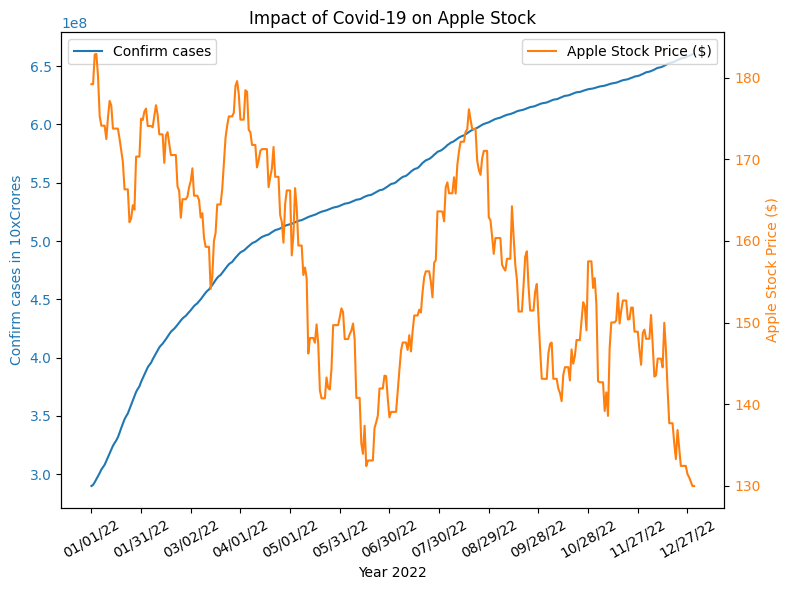

In [462]:
aggr_data_2022 = aggr_data.loc['01/01/22':'12/31/22']
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:blue'
ax1.set_xlabel('Year 2022')
ax1.set_ylabel('Confirm cases in 10xCrores', color=color)
ax1.plot(aggr_data_2022.index, aggr_data_2022['confirm_cases'], label='Confirm cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.set_xticks(aggr_data_2022.index[::30])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Apple Stock Price ($)', color=color)
ax2.plot(aggr_data_2022.index, aggr_data_2022['apple_high_value'], label='Apple Stock Price ($)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

ax1.set_title('Impact of Covid-19 on Apple Stock')
plt.tight_layout()

plt.show()


#### Plotting the graph to show the impact of covid on Air Canada Stock

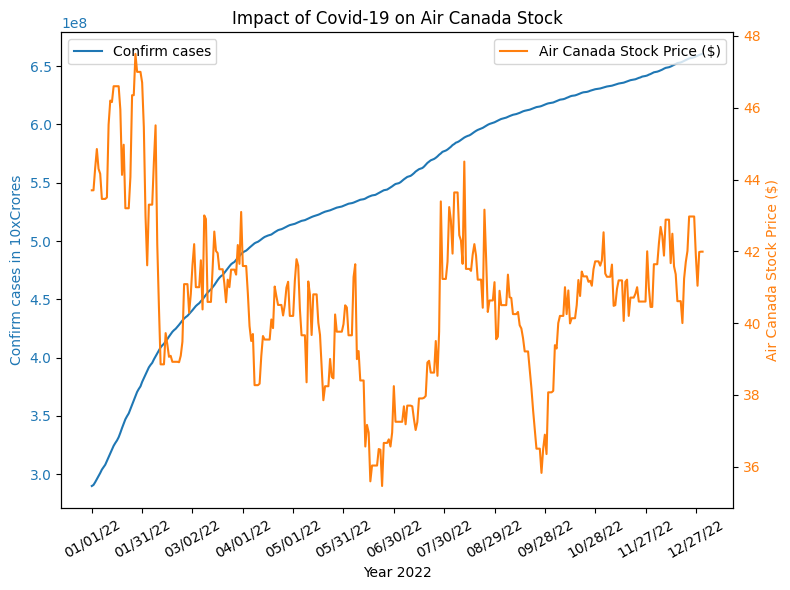

In [461]:
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:blue'
ax1.set_xlabel('Year 2022')
ax1.set_ylabel('Confirm cases in 10xCrores', color=color)
ax1.plot(aggr_data_2022.index, aggr_data_2022['confirm_cases'], label='Confirm cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.set_xticks(aggr_data_2022.index[::30])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Air Canada Stock Price ($)', color=color)
ax2.plot(aggr_data_2022.index, aggr_data_2022['air_canada_high'], label='Air Canada Stock Price ($)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

ax1.set_title('Impact of Covid-19 on Air Canada Stock')
plt.tight_layout()
plt.show()


#### Top 20 countries according to the confirmed COVID-19 numbers for a given date.

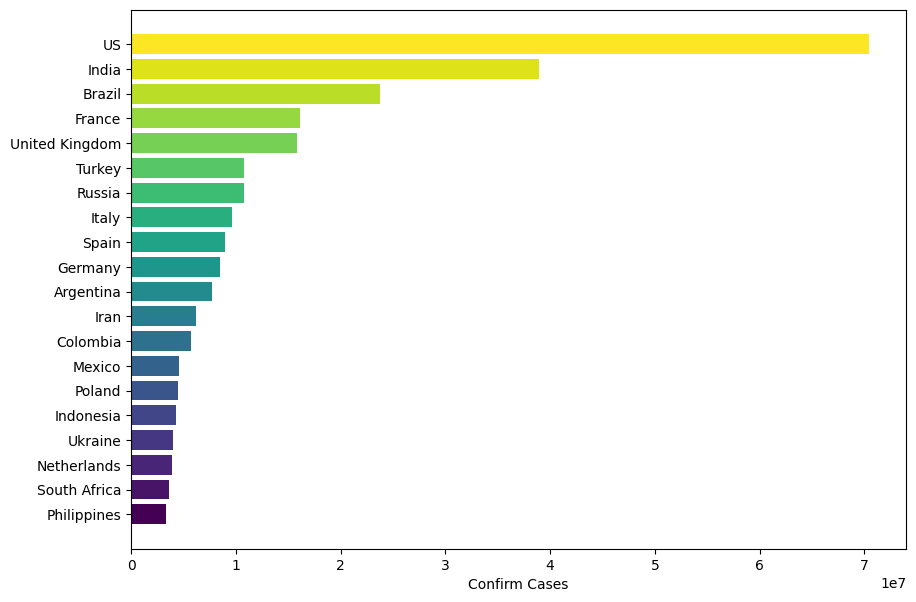

In [512]:
given_date = '1/21/22'
data = confirmed_summary_new.loc[given_date].sort_values().tail(20)
df = pd.DataFrame(data)

fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.barh(pd.Series(data.index[0:20]), pd.Series(data[0:20]), color=plt.cm.viridis(np.linspace(0, 1, len(pd.Series(data.index[0:20])))))
plt.xlabel('Confirm Cases')

# Show Plot
plt.show()